# Notebook to load and play around with the data
Load ramete lists and pedigree data. Plays around with them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [24]:
in_fld = "./Input/"      # Input Folder
out_fld = "./Output/"    # Output Folder

years = list(range(2010,2017))                                 # Make List of all Years
fls = [("pedigree_" + str(i) + "_Loci95.csv") for i in years]  # File Names

geo_fl = "FinalGenoEcol_short_int.csv"  # The Path to the GPS File. Uses track scores, geno scores & 

In [25]:
# Load the SNPPit Results:

### Load the Pedigree as concatenated over the years
df_p = pd.read_csv(in_fld + fls[0], sep=",", index_col=0)

for i in range(1, len(fls)):
    df_t = pd.read_csv(in_fld + fls[i], sep=",", index_col=0)              # Enter the Year
    assert(np.sum(df_p.columns != df_t.columns)==0) # Check if anymismatch
    df_p = pd.concat([df_p, df_t])

# Extract the interesting columns:


print("Loaded Pedigree dataframe: %i raws" % len(df_p))
print(df_p.year_kid.value_counts())

#df_p = df_p Extract only interesting Columns

# Load the GPS data:
df_geo = pd.read_csv(in_fld + geo_fl, sep=",")
# Extract interesting summary stats:
cols = ["PlantID_final", "RametIDs", "Easting", "Northing", "Altitude", "Score_phase1", "GenoScore"]
alive_cols = ["AliveRec_" + str(i) for i in range(2009,2017)]

df_geo = df_geo[cols + alive_cols]  # Extract interesting columns

print("Loaded Nr of Ramets: %i" % len(df_geo))
print("Loading complete!!")

# Merge in datatable of kid,pa & ma with scores, positions and years alive
df = pd.merge(df_p, df_geo, left_on="Kid", right_on="PlantID_final", how='left', suffixes=('', '_kid'))
df = pd.merge(df, df_geo, left_on="Ma", right_on="PlantID_final", how='left', suffixes=('', '_Ma'))
df = pd.merge(df, df_geo, left_on="Pa", right_on="PlantID_final", how='left', suffixes=('', '_Pa'))

print("\nFull data table produced: %i raws, %i cols" % np.shape(df))
print("Dataframe found in df")

Loaded Pedigree dataframe: 1476 raws
2014    669
2013    288
2016    256
2015    220
2012     32
2011     11
Name: year_kid, dtype: int64
Loaded Nr of Ramets: 19910
Loading complete!!

Full data table produced: 1476 raws, 85 cols
Dataframe found in df


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (276,277,279,280,281,282,283,284,285,291,292,294,295,296,297,298,299,300,306,307,309,310,311,312,313,314,315,336,337,339,340,341,342,343,344,345,355,356,357,359,360,401,402,403,412) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Plot Dispersal Distances across the years

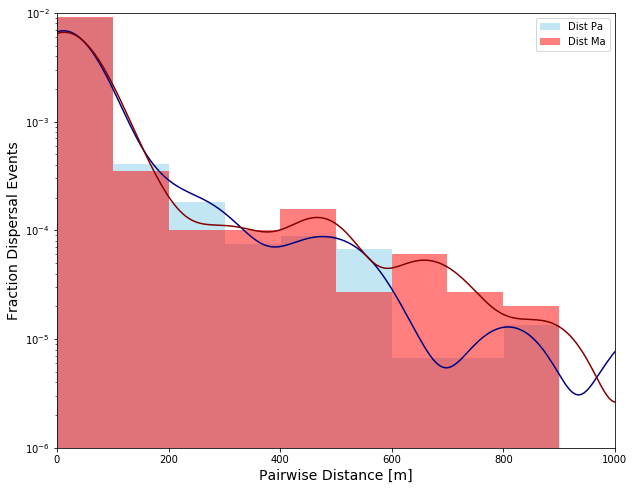

215.5808060861756
137.2894891993397


In [48]:
# Plot Dispersal Distances across the years:
fs = 14

f=stats.gaussian_kde(df.Dist_pa)
g=stats.gaussian_kde(df.Dist_ma)

x=np.linspace(0,1000,200)
plt.figure(figsize=(10,8))

plt.hist(df.Dist_pa, bins = 50, density=True, label="Dist Pa", alpha=0.5, color="skyblue")
plt.hist(df.Dist_ma, bins = 50, density=True, label="Dist Ma", color="red", alpha=0.5)
plt.plot(x,f(x), color="navy")
plt.plot(x,g(x), color="maroon")

plt.ylim([0.000001,0.01])
plt.xlim([0,1000])
plt.legend()
plt.xlabel("Pairwise Distance [m]", fontsize=fs)
plt.ylabel("Fraction Dispersal Events", fontsize=fs)
plt.yscale("log")
plt.show()

print(np.std(df.Dist_pa))
print(np.std(df.Dist_pa[df.Dist_pa<4000]))

# Plot Dispersal Distances across minimum Geo score

In [ ]:
df_geo

# Area 51

In [32]:
df_p

Kid     Pa     Ma        X_kid        Y_kid         X_pa         Y_pa  \
1    L0947  J1571  J1296  423399.6928  4685916.403  423790.9453  4686041.513   
2    L0568  J0874  J1215  423499.6804  4687288.717  423522.7437  4687284.873   
3    L1492  K0962  K0178  423885.4260  4686467.729  423885.7150  4686468.051   
4    L0914  J0228  J1251  423910.8714  4686067.579  423908.5517  4686066.623   
5    L1480  K1504  J0641  424293.2451  4686418.234  424272.8492  4686413.593   
6    L0584  J1050  J0678  424310.7386  4686412.922  424287.5434  4686406.317   
7    L0571  J0365  J0433  424311.6874  4686413.412  424230.2087  4686431.634   
8    L0810  J0613  J0605  424352.8511  4686440.203  424327.9764  4686424.549   
9    L1423  K1058  J0995  424476.4128  4686404.851  424476.7345  4686390.332   
10   L0880  K1058  K1171  424477.6091  4686401.771  424476.7345  4686390.332   
11   L1892  K1034  J0751  424552.1836  4686068.561  424551.8727  4686065.608   
1    M1417  J1175  J0874  423502.0088  4687285.065  423521.5259  4687291.058   
2    M1532  J1218  J1202  423502.8000  4687298.000  423522.3137  4687290.838   
3    M0723  J1202  J0864  423503.4906  4687295.939  423524.8016  4687296.711   
4    M0427  K0129  K1719  423526.5331  4685924.065  423527.5840  4685925.897   
5    M0226  J0065  K0539  423534.8712  4685926.107  423529.3557  4685906.193   
6    M0222  J1661  K0523  423616.7000  4685972.000  423574.6987  4685935.038   
7    M0240  K1483  J1683  423662.0708  4685986.587  423623.0557  4685965.276   
8    M0338  K0133  J1398  423706.8000  4686020.000  423705.7778  4686018.506   
9    M0346  J0284  J0477  423808.0194  4686039.431  423801.1674  4686054.808   
10   M0043  J0063  J1223  423838.1724  4686047.272  423435.6368  4685898.972   
11   M0045  J1547  J1581  423838.6191  4686048.009  423830.6053  4686051.076   
12   M0037  J1548  J1591  423839.2706  4686046.916  423840.4017  4686050.118   
13   M1038  K2002  K1388  424030.4962  4686111.833  424024.7422  4686107.340   
14   M0083  J0627  J0639  424064.4000  4686120.000  424040.0564  4686092.560   
15   M1454  J0887  J0791  424100.4944  4686120.435  424091.0975  4686128.397   
16   M1925  J0265  J0261  424130.2794  4686108.182  424131.1920  4686111.722   
17   M2033  L0541  J0158  424138.3343  4686440.644  424133.5775  4686438.391   
18   M0868  J0223  J0086  424170.1000  4686121.000  424171.0613  4686119.416   
19   M1727  K0590  K0748  424177.9978  4686118.522  424177.7414  4686118.969   
..     ...    ...    ...          ...          ...          ...          ...   
227  V2295  L1632  K0753  424236.5000  4686128.000  424235.2423  4686130.398   
228  V2098  P0597  P0027  424238.9000  4686128.000  424239.9496  4686126.427   
229  V4749  P0597  S0365  424239.0000  4686129.000  424239.9496  4686126.427   
230  V0019  L0112  K0148  424246.4000  4686130.000  423511.6107  4685924.440   
231  V4109  T1651  M1274  424261.2000  4686417.000  424262.6000  4686418.000   
232  V2242  L0125  L1649  424265.1000  4686140.000  424245.5477  4686121.445   
233  V0013  L1863  P0027  424265.6000  4686135.000  424228.9736  4686128.403   
234  V2894  J0920  M1258  424266.4000  4686417.000  424264.5963  4686411.353   
235  V0811  J1050  L0401  424267.1000  4686415.000  424287.5434  4686406.317   
236  V2254  L1649  K0753  424268.1000  4686131.000  424265.4859  4686130.999   
237  V0290  J0455  L1649  424268.8000  4686132.000  424246.7482  4686129.555   
238  V0295  L1649  K0753  424271.0000  4686132.000  424265.4859  4686130.999   
239  V2253  L1868  L0122  424272.3000  4686136.000  424281.2917  4686133.776   
240  V0296  M0295  K0148  424273.0000  4686139.000  424177.9736  4686122.418   
241  V6628  K0748  K0753  424273.7000  4686135.000  424273.3577  4686134.014   
242  V0020  K0148  K0023  424274.7000  4686133.000  424277.3325  4686132.342   
243  V0014  M0025  K0148  424275.4000  4686133.000  423929.8000  4686080.000   
244  V0817  L0549  L1609  424275.6000  4686416.000  424280.5480  4686418.363   
245  V4

Kid
Pa
Ma
X_kid
Y_kid
X_pa
Y_pa
X_ma
Y_ma
Dist_pa
Dist_ma
Pheno_kid
Pheno_pa
Pheno_ma
Red_kid
Yellow_kid
Red_pa
Yellow_pa
Red_ma
Yellow_ma
year_kid
year_pa
year_ma
FDR
Pvalue
LOD
P.Pr.C_Se_Se
P.Pr.Max
MaxP.Pr.Relat
TotPaNonExc
TotMaNonExc
TotUnkNonExc
TotPairsNonExc
KidMiss
PaMiss
MaMiss
MI.Kid.Pa
MI.Kid.Ma
MI.Trio
MendIncLoci
year
PlantID_final
RametIDs
Easting
Northing
Altitude
Score_phase1
GenoScore
AliveRec_2009
AliveRec_2010
AliveRec_2011
AliveRec_2012
AliveRec_2013
AliveRec_2014
AliveRec_2015
AliveRec_2016
PlantID_final_Ma
RametIDs_Ma
Easting_Ma
Northing_Ma
Altitude_Ma
Score_phase1_Ma
GenoScore_Ma
AliveRec_2009_Ma
AliveRec_2010_Ma
AliveRec_2011_Ma
AliveRec_2012_Ma
AliveRec_2013_Ma
AliveRec_2014_Ma
AliveRec_2015_Ma
AliveRec_2016_Ma
PlantID_final_Pa
RametIDs_Pa
Easting_Pa
Northing_Pa
Altitude_Pa
Score_phase1_Pa
GenoScore_Pa
AliveRec_2009_Pa
AliveRec_2010_Pa
AliveRec_2011_Pa
AliveRec_2012_Pa
AliveRec_2013_Pa
AliveRec_2014_Pa
AliveRec_2015_Pa
AliveRec_2016_Pa


In [38]:
df.year_kid.value_counts()

2014    669
2013    288
2016    256
2015    220
2012     32
2011     11
Name: year_kid, dtype: int64

In [11]:
x=np.random.exponential(size=10000)
f=stats.gaussian_kde(x)

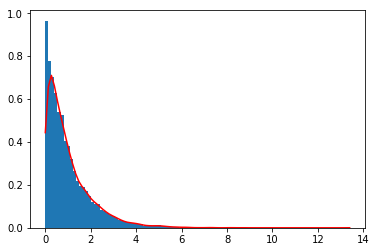

In [23]:
plt.figure()

_, bins, _ = plt.hist(x, density=True, bins=100)
plt.plot(bins, f(bins), "r-")

plt.show()

In [22]:
bins

array([4.26888599e-05, 1.34023052e-01, 2.68003415e-01, 4.01983778e-01,
       5.35964141e-01, 6.69944504e-01, 8.03924867e-01, 9.37905230e-01,
       1.07188559e+00, 1.20586596e+00, 1.33984632e+00, 1.47382668e+00,
       1.60780705e+00, 1.74178741e+00, 1.87576777e+00, 2.00974814e+00,
       2.14372850e+00, 2.27770886e+00, 2.41168922e+00, 2.54566959e+00,
       2.67964995e+00, 2.81363031e+00, 2.94761068e+00, 3.08159104e+00,
       3.21557140e+00, 3.34955177e+00, 3.48353213e+00, 3.61751249e+00,
       3.75149286e+00, 3.88547322e+00, 4.01945358e+00, 4.15343394e+00,
       4.28741431e+00, 4.42139467e+00, 4.55537503e+00, 4.68935540e+00,
       4.82333576e+00, 4.95731612e+00, 5.09129649e+00, 5.22527685e+00,
       5.35925721e+00, 5.49323758e+00, 5.62721794e+00, 5.76119830e+00,
       5.89517866e+00, 6.02915903e+00, 6.16313939e+00, 6.29711975e+00,
       6.43110012e+00, 6.56508048e+00, 6.69906084e+00, 6.83304121e+00,
       6.96702157e+00, 7.10100193e+00, 7.23498230e+00, 7.36896266e+00,
      